In [1]:
from __future__ import division
import csv
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import gamma,norm,rayleigh,describe,scoreatpercentile
import pylab as pl
get_ipython().magic(u'matplotlib inline')

In [2]:
class Parameters():
    def __init__(self, demand, slope_index, pipe_diameter, pump_hp, z_max_route, length_centralized_m,pop_density_grid, miles_to_disposal, miles_transport, lifetime, lifetime_treatment, street_density, pump_operating_fraction, coagulation_time, flocculation_time, alum_density, alum_energy, alum_GHG, RSF_rate, RSF_sand_depth, RSF_sand_energy ,RSF_sand_GHG,RSF_sand_density, RSF_anthracite_depth, RSF_anthracite_density, RSF_anthracite_energy, RSF_anthracite_GHG, retention_time, motor_efficiency, reinf_concrete_energy, reinf_concrete_GHG, media_filtration_energy, flocculation_energy, MBR_GHG, landfill_GHG, cement_energy, cement_GHG, storage_days, sludge_mass, percent_fertilizer,excavation_energy,excavation_GHG,transport_energy,transport_GHG,steel_energy,steel_GHG,chlorine_energy,chlorine_GHG,chlorine_mass,chlorine_retention_time,pipe_energy_EF, pipe_GHG_EF, pump_energy_EF, pump_GHG_EF, pipe_maint_energy, pipe_maint_GHG,Electricity_GHG_LCA, Treatment_capital_energy_m3, Treatment_capital_GHG_m3,Treatment_operational_energy_m3,Treatment_operational_GHG_m3):
        self.demand = demand
        self.slope_index = slope_index
        self.pipe_diameter = pipe_diameter
        self.pump_hp=pump_hp
        self.z_max_route=z_max_route
        self.length_centralized_m=length_centralized_m
        self.pop_density_grid = pop_density_grid
        self.miles_to_disposal = miles_to_disposal
        self.miles_transport = miles_transport
        self.lifetime = lifetime
        self.lifetime_treatment=lifetime_treatment
        self.street_density = street_density
        self.pump_operating_fraction = pump_operating_fraction
        self.coagulation_time = coagulation_time
        self.flocculation_time = flocculation_time
        self.alum_density = alum_density
        self.alum_energy = alum_energy
        self.alum_GHG = alum_GHG
        self.RSF_rate = RSF_rate
        self.RSF_sand_depth = RSF_sand_depth
        self.RSF_sand_energy = RSF_sand_energy
        self.RSF_sand_GHG = RSF_sand_GHG  
        self.RSF_sand_density=RSF_sand_density
        self.RSF_anthracite_depth = RSF_anthracite_depth
        self.RSF_anthracite_density = RSF_anthracite_density
        self.RSF_anthracite_energy = RSF_anthracite_energy
        self.RSF_anthracite_GHG = RSF_anthracite_GHG
        self.retention_time = retention_time
        self.motor_efficiency = motor_efficiency
        self.reinf_concrete_energy = reinf_concrete_energy
        self.reinf_concrete_GHG = reinf_concrete_GHG
        self.media_filtration_energy = media_filtration_energy
        self.flocculation_energy = flocculation_energy
        self.MBR_GHG = MBR_GHG
        self.landfill_GHG = landfill_GHG
        self.cement_energy = cement_energy
        self.cement_GHG = cement_GHG
        self.storage_days = storage_days
        self.sludge_mass = sludge_mass
        self.percent_fertilizer = percent_fertilizer
        self.excavation_energy = excavation_energy
        self.excavation_GHG = excavation_GHG
        self.transport_energy = transport_energy
        self.transport_GHG = transport_GHG
        self.steel_energy = steel_energy
        self.steel_GHG = steel_GHG
        self.chlorine_energy = chlorine_energy
        self.chlorine_GHG = chlorine_GHG
        self.chlorine_mass = chlorine_mass
        self.chlorine_retention_time= chlorine_retention_time
        self.pipe_energy_EF = pipe_energy_EF
        self.pipe_GHG_EF = pipe_GHG_EF
        self.pump_energy_EF = pump_energy_EF
        self.pump_GHG_EF = pump_GHG_EF
        self.pipe_maint_energy = pipe_maint_energy
        self.Electricity_GHG_LCA = Electricity_GHG_LCA
        self.pipe_maint_GHG = pipe_maint_GHG
        self.Treatment_capital_energy_m3 = Treatment_capital_energy_m3
        self.Treatment_capital_GHG_m3 = Treatment_capital_GHG_m3
        self.Treatment_operational_energy_m3 = Treatment_operational_energy_m3
        self.Treatment_operational_GHG_m3 = Treatment_operational_GHG_m3
        
    def perturb(self):
        new_demand = np.random.uniform(0.1,0.3)
        new_slope_index = np.random.uniform(0.9*slope_index,1.1*slope_index)
        new_pipe_diameter = self.pipe_diameter
        new_pump_hp=self.pump_hp
        new_z_max_route=self.z_max_route
        new_length_centralized_m=np.random.uniform(0.7*length_centralized_m,1.3*length_centralized_m)
        new_pop_density_grid = np.random.uniform(0.9*pop_density_grid,1.1*pop_density_grid)
        new_miles_to_disposal =np.random.triangular(20,30,50)
        new_miles_transport =np.random.triangular(20,50,80)
        new_lifetime = np.random.triangular(0.8*self.lifetime,self.lifetime,1.2*self.lifetime)
        new_lifetime_treatment=np.random.triangular(0.8*self.lifetime_treatment,self.lifetime_treatment,1.2*self.lifetime_treatment)
        new_street_density = np.random.triangular(4000,8000,15000)
        new_pump_operating_fraction = np.random.triangular(0.4,0.8,0.95)
        new_coagulation_time = np.random.uniform(0.03,0.05)
        new_flocculation_time = np.random.uniform(0.2,0.8)
        new_alum_density = np.random.uniform(20,225)
        new_alum_energy = np.random.uniform(0.8*self.alum_energy,1.2*self.alum_energy)
        new_alum_GHG = np.random.uniform(0.8*self.alum_GHG,1.2*self.alum_GHG)
        new_RSF_rate = np.random.uniform(117,585)
        new_RSF_sand_depth = np.random.uniform(0.5,0.750)
        new_RSF_sand_energy = np.random.uniform(0.8*self.RSF_sand_energy,1.2*self.RSF_sand_energy)
        new_RSF_sand_GHG = np.random.uniform(0.8*self.RSF_sand_GHG,1.2*self.RSF_sand_GHG)  
        new_RSF_sand_density = self.RSF_sand_density
        new_RSF_anthracite_depth = np.random.uniform(0.6,0.90)
        new_RSF_anthracite_density = self.RSF_anthracite_density
        new_RSF_anthracite_energy = np.random.uniform(0.8*self.RSF_anthracite_energy,1.2*self.RSF_anthracite_energy)
        new_RSF_anthracite_GHG = np.random.uniform(0.8*self.RSF_anthracite_GHG,1.2*self.RSF_anthracite_GHG)
        new_retention_time = self.retention_time
        new_motor_efficiency = self.motor_efficiency
        new_reinf_concrete_energy = np.random.uniform(0.8*self.reinf_concrete_energy,1.2*self.reinf_concrete_energy)
        new_reinf_concrete_GHG = np.random.uniform(0.8*self.reinf_concrete_GHG,1.2*self.reinf_concrete_GHG)
        new_media_filtration_energy = np.random.uniform(0.03,0.08)
        new_flocculation_energy = np.random.uniform(0.8*self.flocculation_energy,1.2*self.flocculation_energy)
        new_MBR_GHG = np.random.triangular(0.1,0.23,0.4)
        new_landfill_GHG = np.random.uniform(0.7*self.landfill_GHG,1.3*self.landfill_GHG)
        new_cement_energy = np.random.uniform(0.9*self.cement_energy,1.1*self.cement_energy)
        new_cement_GHG = np.random.uniform(0.9*self.cement_GHG,1.1*self.cement_GHG)
        new_storage_days = np.random.uniform(2,5)
        new_sludge_mass = np.random.uniform(0.8*self.sludge_mass,1.2*self.sludge_mass)
        new_percent_fertilizer = np.random.triangular(0,0.5,1)
        new_excavation_energy = np.random.uniform(0.8*self.excavation_energy,1.2*self.excavation_energy)
        new_excavation_GHG = np.random.uniform(0.8*self.excavation_GHG,1.2*self.excavation_GHG)
        new_transport_energy = np.random.uniform(0.8*self.transport_energy,1.2*self.transport_energy)
        new_transport_GHG = np.random.uniform(0.16,2.9)
        new_steel_energy = np.random.uniform(0.8*self.steel_energy,1.2*self.steel_energy)
        new_steel_GHG = np.random.uniform(0.8*self.steel_GHG,1.2*self.steel_GHG)
        new_chlorine_energy = np.random.uniform(0.8*self.chlorine_energy,1.2*self.chlorine_energy)
        new_chlorine_GHG = np.random.uniform(0.8*self.chlorine_GHG,1.2*self.chlorine_GHG)
        new_chlorine_mass = np.random.uniform(6,15)
        new_chlorine_retention_time=np.random.uniform(30,120)
        new_pipe_energy_EF = np.random.uniform(0.8*self.pipe_energy_EF,1.2*self.pipe_energy_EF)
        new_pipe_GHG_EF = np.random.uniform(0.8*self.pipe_GHG_EF,1.2*self.pipe_GHG_EF)
        new_pump_energy_EF = np.random.uniform(0.8*self.pump_energy_EF,1.2*self.pump_energy_EF)
        new_pump_GHG_EF = np.random.uniform(0.8*self.pump_GHG_EF,1.2*self.pump_GHG_EF)
        new_pipe_maint_energy = np.random.uniform(0.8*self.pipe_maint_energy,1.2*self.pipe_maint_energy)
        new_Electricity_GHG_LCA = np.random.uniform(0.08,0.2)
        new_pipe_maint_GHG = np.random.uniform(0.8*self.pipe_maint_GHG,1.2*self.pipe_maint_GHG)
        new_Treatment_capital_energy_m3 = np.random.uniform(0.5*self.Treatment_capital_energy_m3,1.5*self.Treatment_capital_energy_m3)
        new_Treatment_capital_GHG_m3 = np.random.uniform(0.5*self.Treatment_capital_GHG_m3,1.5*self.Treatment_capital_GHG_m3)
        new_Treatment_operational_energy_m3 = np.random.uniform(0.5*self.Treatment_operational_energy_m3,1.5*self.Treatment_operational_energy_m3)
        new_Treatment_operational_GHG_m3 = np.random.uniform(0.5*self.Treatment_operational_GHG_m3,1.5*self.Treatment_operational_GHG_m3)
        
        return Parameters(new_demand, new_slope_index, new_pipe_diameter, new_pump_hp, new_z_max_route, new_length_centralized_m, new_pop_density_grid, new_miles_to_disposal, new_miles_transport, new_lifetime, new_lifetime_treatment, new_street_density, new_pump_operating_fraction, new_coagulation_time, new_flocculation_time, new_alum_density, new_alum_energy, new_alum_GHG, new_RSF_rate, new_RSF_sand_depth, new_RSF_sand_energy, new_RSF_sand_GHG, new_RSF_sand_density, new_RSF_anthracite_depth, new_RSF_anthracite_density, new_RSF_anthracite_energy, new_RSF_anthracite_GHG, new_retention_time, new_motor_efficiency, new_reinf_concrete_energy,new_reinf_concrete_energy, new_media_filtration_energy, new_flocculation_energy, new_MBR_GHG, new_landfill_GHG, new_cement_energy, new_cement_GHG, new_storage_days, new_sludge_mass, new_percent_fertilizer,new_excavation_energy,new_excavation_GHG,new_transport_energy,new_transport_GHG,new_steel_energy,new_steel_GHG,new_chlorine_energy,new_chlorine_GHG,new_chlorine_mass,new_chlorine_retention_time,new_pipe_energy_EF, new_pipe_GHG_EF, new_pump_energy_EF, new_pump_GHG_EF, new_pipe_maint_energy, new_pipe_maint_GHG,new_Electricity_GHG_LCA, new_Treatment_capital_energy_m3, new_Treatment_capital_GHG_m3,new_Treatment_operational_energy_m3,new_Treatment_operational_GHG_m3)

    
    def simulate(self):
        total_demand=people*self.demand/(24)
        Pipe_const_energy=(pipe_length*(pipe_energy_EF)*(pipe_weight))/self.lifetime
        Pipe_const_GHG=Pipe_const_energy/3.6*self.Electricity_GHG_LCA
        
        Pipe_mass=pipe_length*(pipe_weight)
        Pipe_excavation_vol=pipe_length*(pipe_excav_vol)
        Pipe_excavation_energy=Pipe_excavation_vol*(self.excavation_energy)/self.lifetime
        Pipe_excavation_GHG=Pipe_excavation_vol*(self.excavation_GHG)/self.lifetime

        #Piping transportation
        Pipe_transport_energy=self.transport_energy*self.miles_transport*Pipe_mass/(1000*self.lifetime)
        Pipe_transport_GHG=self.transport_GHG*self.miles_transport*Pipe_mass/(1000*self.lifetime)
        
        Pipe_capital_energy=Pipe_const_energy+Pipe_excavation_energy+Pipe_transport_energy
        Pipe_capital_GHG=Pipe_const_GHG+Pipe_excavation_GHG+Pipe_transport_GHG

        Pipe_operat_energy=self.pipe_maint_energy
        Pipe_operat_GHG=self.pipe_maint_GHG
        
        Pump_operat_energy=var.specific_weight_water*total_head*(total_demand/3600)*self.pump_operating_fraction*24*365/(pump_efficiency*self.motor_efficiency)*3.6
        Pump_operat_GHG=Pump_operat_energy/3.6*self.Electricity_GHG_LCA

        pump_construction_energy=self.pump_energy_EF/self.lifetime
        pump_construction_GHG=self.pump_GHG_EF/self.lifetime

        pump_transport_energy=pump_weight*self.miles_transport*self.transport_energy/(1000*self.lifetime)
        pump_transport_GHG=pump_weight*self.miles_transport*self.transport_GHG/(1000*self.lifetime)

        Pump_capital_energy=pump_construction_energy+pump_transport_energy
        Pump_capital_GHG=pump_construction_GHG+pump_transport_GHG
        
        tank_volume=self.storage_days*total_demand*24 #m3
        tank_radius=math.sqrt(tank_volume/(math.pi*var.tank_height))
        tank_area=2*math.pi*tank_radius*var.tank_height+2*math.pi*tank_radius**2
        tank_cement_volume=0.1*tank_area
        tank_mass_steel=round(tank_area/var.steel_sheet_area,0)*var.steel_sheet_mass

        tank_const_energy=tank_cement_volume*self.reinf_concrete_energy/self.lifetime
        tank_const_GHG=tank_cement_volume*self.reinf_concrete_GHG/self.lifetime

        tank_transport_energy=(tank_cement_volume)*self.transport_energy*self.miles_transport/(self.lifetime*1000)
        tank_transport_GHG=(tank_cement_volume)*self.transport_GHG*self.miles_transport/(self.lifetime*1000)

        Tank_capital_energy=tank_const_energy+tank_transport_energy
        Tank_capital_GHG=tank_const_GHG+tank_transport_GHG
        
        Total_conveyance_capital_GHG_y=Pipe_capital_GHG+Pump_capital_GHG+Tank_capital_GHG
        Total_conveyance_capital_energy_y=Pipe_capital_energy+Pump_capital_energy+Tank_capital_energy

        Total_conveyance_operational_GHG_y=Pipe_operat_GHG+Pump_operat_GHG
        Total_conveyance_operational_energy_y=Pipe_operat_energy+Pump_operat_energy


        ###Treatment
        demand_day=total_demand*24
        Central_treatment_operational_energy_y=self.Treatment_operational_energy_m3*demand_day*365
        Central_treatment_capital_energy_y=self.Treatment_capital_energy_m3*demand_day*365

        Central_treatment_operational_GHG_y=self.Treatment_operational_GHG_m3*demand_day*365
        Central_treatment_capital_GHG_y=self.Treatment_capital_GHG_m3*demand_day*365

        RSF_Area=people*self.demand/self.RSF_rate #m2
        RSF_sand_volume=RSF_Area*(self.RSF_sand_depth) #m3
        RSF_anthracite_volume=RSF_Area*(self.RSF_anthracite_depth) #m3
        RSF_volume=RSF_sand_volume+RSF_anthracite_volume
        RSF_surface_area=RSF_Area+8*RSF_volume/RSF_Area

        RSF_tank_mass_steel=round(RSF_surface_area/var.steel_sheet_area,0)*var.steel_sheet_mass
        RSF_sand_mass=self.RSF_sand_density*RSF_sand_volume
        RSF_anthracite_mass=self.RSF_anthracite_density*RSF_anthracite_volume

        # RSF tank construction
        RSF_tank_const_energy=RSF_tank_mass_steel*self.steel_energy/self.lifetime
        RSF_tank_const_GHG=RSF_tank_mass_steel*self.steel_GHG/self.lifetime

        # RSF_tank transport
        RSF_tank_transport_energy=RSF_tank_mass_steel*self.transport_energy*self.miles_transport/(self.lifetime*1000)
        RSF_tank_transport_GHG=RSF_tank_mass_steel*self.transport_GHG*self.miles_transport/(self.lifetime*1000)

        # RSF sand construction
        RSF_sand_const_energy=(RSF_sand_mass*self.RSF_sand_energy+RSF_anthracite_mass*self.RSF_anthracite_energy)/self.lifetime_treatment
        RSF_sand_const_GHG=(RSF_sand_mass*self.RSF_sand_GHG+RSF_anthracite_mass*self.RSF_anthracite_GHG)/self.lifetime_treatment

        # RSF_sand transport
        RSF_sand_transport_energy=(RSF_sand_mass+RSF_anthracite_mass)*self.transport_energy*self.miles_transport/(self.lifetime_treatment*1000)
        RSF_sand_transport_GHG=(RSF_sand_mass+RSF_anthracite_mass)*self.transport_GHG*self.miles_transport/(self.lifetime_treatment*1000)

        #Coagulation & Flocculation
        Coagulation_volume=people*self.demand/24*self.coagulation_time
        Coagulation_radius=math.sqrt(Coagulation_volume/(math.pi*1))
        Flocculation_volume=people*self.demand/24*self.flocculation_time
        Flocculation_radius=math.sqrt(Flocculation_volume/(math.pi*1))
        Coagu_Flocc_cement_volume=(((Coagulation_radius+0.1)**2-(Coagulation_radius)**2)*3.14)+((Flocculation_radius+0.1)**2-(Flocculation_radius)**2)*3.14

        #Alum addition
        Alum_mass=self.alum_density*demand_day/1000*365
        Alum_manufacturing_energy=Alum_mass*self.alum_energy
        Alum_transport_energy=Alum_mass*self.transport_energy*self.miles_transport/1000
        Alum_manufacturing_GHG=Alum_mass*self.alum_GHG
        Alum_transport_GHG=Alum_mass*self.transport_GHG*self.miles_transport/1000
        Alum_operational_energy_y=Alum_manufacturing_energy+Alum_transport_energy
        Alum_operational_GHG_y=Alum_manufacturing_GHG+Alum_transport_GHG

        #Coagulation & Flocculation Totals
        CoagFlocc_Capital_energy_y=Coagu_Flocc_cement_volume*self.reinf_concrete_energy/self.lifetime_treatment
        CoagFlocc_Capital_GHG_y=Coagu_Flocc_cement_volume*self.reinf_concrete_GHG/self.lifetime_treatment
        CoagFlocc_Operational_energy_y=Alum_operational_energy_y+self.flocculation_energy*3.6*demand_day*365
        CoagFlocc_Operational_GHG_y=(self.flocculation_energy*demand_day*365)*self.Electricity_GHG_LCA+Alum_operational_GHG_y

        #Chlorination
        chlorine_volume=self.chlorine_retention_time/24*demand_day
        chlorine_radius=math.sqrt(chlorine_volume/(math.pi*1))
        chlorine_cement_volume=((2*math.pi*chlorine_radius*1)+math.pi*chlorine_radius**2)*0.10

        Chlorine_manufacturing_energy_y=self.chlorine_mass*self.chlorine_energy*demand_day*365/1000+chlorine_cement_volume*self.reinf_concrete_energy/self.lifetime_treatment
        Chlorine_manufacturing_GHG_y=self.chlorine_mass*self.chlorine_GHG*demand_day*365/1000+chlorine_cement_volume*self.reinf_concrete_GHG/self.lifetime_treatment
        Chlorine_transport_energy_y=self.chlorine_mass*self.transport_energy*demand_day*365*self.miles_transport/1000000
        Chlorine_transport_GHG_y=self.chlorine_mass*self.transport_GHG*demand_day*365*self.miles_transport/1000000
        Chlorine_operational_energy_y=Chlorine_manufacturing_energy_y+Chlorine_transport_energy_y
        Chlorine_operational_GHG_y=Chlorine_manufacturing_GHG_y+Chlorine_transport_GHG_y

        Sludge_transport_energy_y=self.sludge_mass*0.2*demand_day*365*self.miles_to_disposal*self.transport_energy/1000
        Sludge_transport_GHG_y=self.sludge_mass*0.2*demand_day*365*self.miles_to_disposal*self.transport_GHG/1000
        Sludge_disposal_GHG_y=self.landfill_GHG*self.sludge_mass*0.2*demand_day*365*var.percent_landfill/(1000)+var.fertilizer_GHG*self.sludge_mass*0.2*demand_day*365*self.percent_fertilizer/(1000)


        #RSF Totals
        RSF_capital_energy_y=RSF_tank_const_energy+RSF_sand_const_energy+RSF_sand_transport_energy+RSF_tank_transport_energy
        RSF_capital_GHG_y=RSF_tank_const_GHG+RSF_sand_const_GHG+RSF_sand_transport_GHG+RSF_tank_transport_GHG

        #RSF operation
        RSF_operational_energy=self.media_filtration_energy*3.6*people*self.demand*365
        RSF_operational_GHG=RSF_operational_energy/3.6*self.Electricity_GHG_LCA

        Total_Treatment_Capital_energy=Central_treatment_capital_energy_y+RSF_capital_energy_y+CoagFlocc_Capital_energy_y
        Total_Treatment_Operational_energy=Central_treatment_operational_energy_y+CoagFlocc_Operational_energy_y+RSF_operational_energy+Chlorine_operational_energy_y+Sludge_transport_energy_y
        Total_Treatment_Capital_GHG=Central_treatment_capital_GHG_y+RSF_capital_GHG_y+CoagFlocc_Capital_GHG_y
        Total_Treatment_Operational_GHG=Central_treatment_operational_GHG_y+CoagFlocc_Operational_GHG_y+RSF_operational_GHG+Chlorine_operational_GHG_y+Sludge_transport_GHG_y+Sludge_disposal_GHG_y


        Total_Energy_y=Total_conveyance_capital_energy_y+Total_conveyance_operational_energy_y+Total_Treatment_Capital_energy+Total_Treatment_Operational_energy
        Total_GHG_y=Total_conveyance_capital_GHG_y+Total_conveyance_operational_GHG_y+Total_Treatment_Capital_GHG+Total_Treatment_Operational_GHG
        Total_Energy_m3_final=Total_Energy_y/(people*self.demand*365)
        Total_GHG_m3_final=Total_GHG_y/(people*self.demand*365)
        
        

        return Output(Total_Energy_m3_final, Total_GHG_m3_final)

    
               
class Output():
    def __init__(self,Total_Energy_m3_final, Total_GHG_m3_final):
        self.Total_GHG_m3_final=Total_GHG_m3_final
        self.Total_Energy_m3_final=Total_Energy_m3_final


In [3]:
Electricity_EF_data = pd.read_csv('Electricity_EF_data.csv')
pipe_construction_data = pd.read_csv('pipe_construction_data.csv')
pipe_diameter_data = pd.read_csv('pipe_diameter_data2.csv')
pipe_maintenance_data = pd.read_csv('pipe_maintenance_data.csv')
pump_construction_data = pd.read_csv('pump_construction_data.csv')
slope_index_data = pd.read_csv('slope_index_data.csv')
steel_data = pd.read_csv('steel_data.csv')
transportation_data = pd.read_csv('transportation_data.csv')
treatment_data = pd.read_csv('treatment_data.csv')

In [4]:
import Variables as var

In [5]:
consumption_pressure=20
slope_index=0.02
pop_density_grid=3000
length_centralized_m=1000
z_max_route=80
people=3000
street_density=8000


In [6]:
pipe_length_dec=people/pop_density_grid*var.street_density

if pipe_length_dec>var.street_density/2:
        pipe_length_dec=var.street_density/2
if people>pop_density_grid/2:
    elevation_dec=500*slope_index
else: 
    elevation_dec=math.sqrt(people/pop_density_grid)*slope_index*1000
if elevation_dec==0:
    elevation_dec=0.1
pipe_length=pipe_length_dec+length_centralized_m
elevation=elevation_dec+z_max_route


#Calculate pipe diameter
total_dem=people*var.demand/(24) #m3/h
if total_dem<1:
    total_dem=1
else:
    total_dem=round(total_dem)

pd_data = pipe_diameter_data
k=pd_data.set_index('Flow_Rate_m3_h')
pipe_diameter=k.PVC_Diameter_mm[total_dem]

total_demand=people*var.demand/(24) #m3/person-h
pipe_area=math.pi*(pipe_diameter*0.001/2)**2
pipe_velocity=total_dem/(3600*pipe_area)

normDiameterList = (50, 100, 160, 200, 350, 375, 450)
index=normDiameterList.index(pipe_diameter)


h1=0.03*pipe_length/((pipe_diameter)*0.001)*(pipe_velocity**2)/(2*9.81)
threshold=0.20*(elevation)

while h1>threshold:
    index=index+1
    if pipe_diameter<600:
        pipe_diameter=normDiameterList[index]
        pipe_area_2=math.pi*(pipe_diameter*0.001/2)**2
        pipe_velocity=total_demand/(3600*pipe_area_2)
        h1=0.03*pipe_length/((pipe_diameter)*0.001)*(pipe_velocity**2)/(2*9.81)
    else:
        pipe_diameter=600
        threshold=h1

if pipe_velocity<=2.5:
    pipe_diameter=pipe_diameter
else:
    index=index+1
    pipe_diameter=normDiameterList[index]

pipe_area_2=math.pi*(pipe_diameter*0.001/2)**2
pipe_velocity_2=total_demand/(3600*pipe_area_2)

pipe_construction_df=pipe_construction_data[(pipe_construction_data['Material'] == (var.pipe_material))]
h=pipe_construction_df.set_index('size_mm')
pipe_emissions_EF=h.Emissions_kgCO2_eq_m[pipe_diameter]
pipe_energy_EF=h.Embodied_Energy_MJ_kg[pipe_diameter]
pipe_cost_EF=h.cost_2012_m[pipe_diameter]
pipe_weight=h.Wt_kg_m[pipe_diameter]
pipe_excav_vol=h.Excavation_vol_m3_m[pipe_diameter]

Electricity_GHG_df=Electricity_EF_data[(Electricity_EF_data['Name'] == (var.Electric_Utility))]
Electricity_GHG_LCA=Electricity_GHG_df['EF_Lifecycle_kg_kWh'].iloc[0]
Electricity_GHG_direct=Electricity_GHG_df['EF_Direct_kg_kWh'].iloc[0]

pipe_maintenance_data['GHG_y'] = pipe_maintenance_data['kg_CO2_m']*pipe_length
pipe_maintenance_data['energy_y'] = pipe_maintenance_data['KWh_m']*pipe_length*3.6
pipe_maint_lifetime=pipe_maintenance_data[pipe_maintenance_data['year_'] <= var.lifetime]
pipe_maint_cost=pipe_maint_lifetime['cost_discount_y'].sum()/var.lifetime
pipe_maint_GHG=pipe_maint_lifetime['GHG_y'].sum()/var.lifetime
pipe_maint_energy=pipe_maint_lifetime['energy_y'].sum()/var.lifetime

headloss=0.03*pipe_length/((pipe_diameter)*0.001)*(pipe_velocity_2**2)/(2*9.81)

#Calculate Pressure
head=elevation-0
pressure=((pipe_velocity_2**2)*var.water_density/2+(consumption_pressure*101325/10)+(head*var.gravity*var.water_density)+(headloss*var.gravity*var.water_density))
total_head=pressure/(var.water_density*var.gravity)

#Calculate pump effieciency
p_hp=(var.specific_weight_water*total_head*(total_demand/3600)/(0.4*var.motor_efficiency))*1.34
if p_hp<3:
    pump_efficiency=0.4
elif 3<=p_hp<7:
    pump_efficiency=0.45
elif 7<=p_hp<15:
    pump_efficiency=0.5
elif 15<=p_hp<40:
    pump_efficiency=0.55
elif 40<=p_hp<60:
    pump_efficiency=0.6
else:
    pump_efficiency=0.7
p_hp=(var.specific_weight_water*total_head*(total_demand/3600)/(pump_efficiency*var.motor_efficiency))*1.34
p_hp=np.random.uniform(0.9*p_hp,1.1*p_hp)


#Calculating actual pump horsepower
Pump_energy_hp=p_hp*3.6*8765/1.34*var.pump_operating_fraction
hp=round(((Pump_energy_hp/3.6)*1.34/8765),2)
if hp<=0.5:
    pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765)*2,1)/2
elif 0.5<hp<10:
    pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765),0)
elif 10<=hp<100:
    pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765)/10,0)*10
else:
    pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765)*2/1000,1)*1000/2

if pump_hp<0.05:
    pump_hp=0.05
    
t=pump_construction_data.set_index('Rating_hp')
pump_cost_EF=t.Cost_2012[pump_hp]
pump_energy_EF=t.Embodied_Energy_MJ[pump_hp]
pump_GHG_EF=t.Emissions_kgCO_eq[pump_hp]
pump_weight=t.Wt_kg[pump_hp]

C:\Users\Olga\Anaconda2\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: scalar indexers for index type Int64Index should be integers and not floating point


In [7]:
paramet=Parameters(var.demand, slope_index, pipe_diameter, pump_hp, z_max_route, length_centralized_m,pop_density_grid, var.miles_to_disposal, var.miles_transport, var.lifetime, var.lifetime_treatment, street_density, var.pump_operating_fraction, var.coagulation_time, var.flocculation_time, var.Alum_density, var.Alum_energy, var.Alum_GHG, var.RSF_rate, var.RSF_sand_depth, var.RSF_sand_energy ,var.RSF_sand_GHG, var.RSF_sand_density, var.RSF_anthracite_depth, var.RSF_anthracite_density, var.RSF_anthracite_energy, var.RSF_anthracite_GHG, var.retention_time, var.motor_efficiency, var.reinf_concrete_energy,var.reinf_concrete_GHG, var.media_filtration_energy, var.flocculation_energy, var.MBR_GHG, var.landfill_GHG, var.cement_energy, var.cement_GHG, var.storage_days, var.sludge_mass, var.percent_fertilizer,var.excavation_energy,var.excavation_GHG,var.transport_energy,var.transport_GHG,var.steel_energy,var.steel_GHG,var.chlorine_energy,var.chlorine_GHG,var.chlorine_mass,var.chlorine_retention_time,pipe_energy_EF, pipe_emissions_EF, pump_energy_EF, pump_GHG_EF, pipe_maint_energy, pipe_maint_GHG,Electricity_GHG_LCA, var.Treatment_capital_energy_m3, var.Treatment_capital_GHG_m3,var.Treatment_operational_energy_m3,var.Treatment_operational_GHG_m3)

In [8]:
tot_ener=[]
tot_GHG=[]
i=0
while i<10000:
    i+=1
    
    new_params=paramet.perturb()
    out_after=new_params.simulate()
    energy_m3=out_after.Total_Energy_m3_final
    GHG_m3=out_after.Total_GHG_m3_final
    tot_ener.append(energy_m3)
    tot_GHG.append(GHG_m3)


(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 <a list of 8 Text yticklabel objects>)

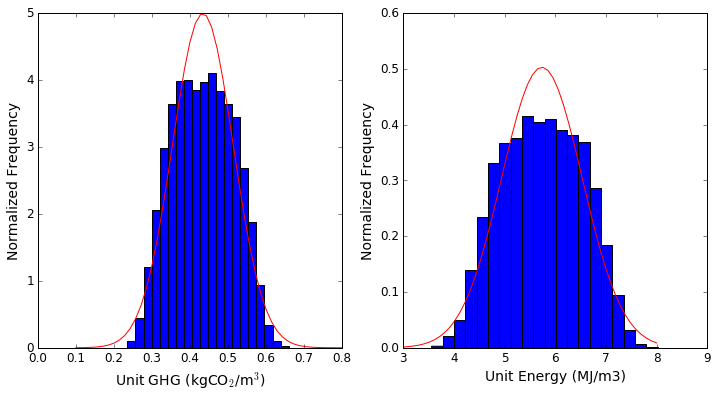

In [9]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,2, 1)
plt.hist(tot_GHG,bins=20,normed=1)
plt.xlabel('Unit GHG (kgCO$_2$/m$^3$)',fontsize=14)
plt.xlim(0,0.8)
param = norm.fit(tot_GHG)
x = np.linspace(0.1,0.8)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])
plt.plot(x,pdf_fitted,'r-')
plt.ylabel("Normalized Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.add_subplot(1, 2, 2)
plt.hist(tot_ener,bins=20,normed=1)
plt.xlabel('Unit Energy (MJ/m3)',fontsize=14)
param2 = norm.fit(tot_ener)
x2 = np.linspace(3,8)
# fitted distribution
pdf_fitted2 = norm.pdf(x2,loc=param2[0],scale=param2[1])
plt.plot(x2,pdf_fitted2,'r-')
plt.ylabel("Normalized Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [12]:
describe(tot_GHG)

DescribeResult(nobs=10000L, minmax=(0.24036769763615579, 0.65380127838941515), mean=0.43492125249517766, variance=0.0063555118186931691, skewness=-0.0017160090637294, kurtosis=-0.8528582439969847)

In [17]:
p = 1. * np.arange(len(tot_GHG)) / (len(tot_GHG) - 1)
data_sorted=np.sort(tot_GHG)

p2 = 1. * np.arange(len(tot_ener)) / (len(tot_ener) - 1)
data_sorted2=np.sort(tot_ener)


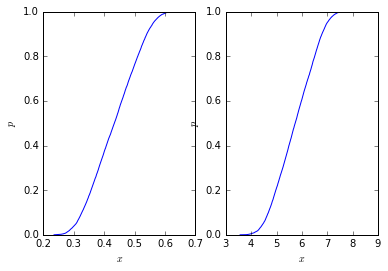

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(data_sorted, p)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$p$')

ax2 = fig.add_subplot(122)
ax2.plot(data_sorted2, p)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$p$')

In [13]:
describe(tot_ener)

DescribeResult(nobs=10000L, minmax=(3.6849764574912869, 7.7775647566106469), mean=5.7441625576754287, variance=0.63210042683368772, skewness=-0.015177588866416186, kurtosis=-0.8133159133916767)

In [14]:
centr

[683769.5399448806,
 545141.4147150535,
 661913.2914332318,
 149137.71794917565,
 433962.56036824826,
 1069413.3332927304,
 631725.0213261335,
 516755.2008679739,
 267282.18577186955,
 363328.84097130335,
 551397.83043071,
 666775.9432651598,
 418747.6911553362,
 321992.2128737795,
 359601.54027981556,
 647812.4021042038,
 716709.868582248,
 471809.7349096856,
 963964.9920385908,
 577558.5632609293,
 998236.3808363609,
 400784.10666475,
 383958.97263672744,
 657611.7975362135,
 1026530.8137698115,
 342633.0366804763,
 582909.3172550964,
 410506.06294504367,
 831712.8453921186,
 389440.6636736809,
 500221.87497838447,
 452807.04755624256,
 284888.2664971082,
 336296.8915779467,
 274081.5773519366,
 1077108.0429147892,
 448459.5656997609,
 560336.5217359634,
 327116.55164212635,
 543871.1512147908,
 447446.51177304634,
 959589.8615856622,
 498980.54817660706,
 732437.0016501701,
 470907.1424121757,
 225416.11521961036,
 1049269.6226523095,
 643544.417797487,
 609627.6964665096,
 606493.2